# Classificação de Dados Sintéticos com SVM, Pipeline de Pré-processamento e Árvore de Decisão

In [ ]:
import pandas as pd 

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [2]:
x, y = make_classification(n_samples=100, random_state=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=1)

In [3]:
tdf = pd.DataFrame(x_train)
tdf['target'] = y_train
tdf['target'] = tdf['target'].astype('str')
tdf.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,1.007966,1.300227,0.528003,0.434998,-0.199561,-0.173949,-0.423478,-0.948440,-0.654603,0.910424,...,0.104053,1.125323,-0.785654,-1.232123,-1.345010,-0.314564,0.074321,0.448381,-1.295258,1
1,1.068986,0.718515,-1.419149,0.931256,-0.190548,-0.768740,-0.456988,0.925501,0.233339,0.949809,...,0.140110,1.812528,-1.319182,-1.395699,0.640986,-0.316901,-1.133792,0.935148,1.219874,1
2,-0.790800,0.676980,0.026000,1.018552,-0.592461,-0.592108,-0.459930,-1.181103,-2.304908,1.230558,...,-0.477581,1.448989,-1.068983,-1.174529,1.302536,-1.348696,-1.485156,-0.059368,-0.362612,1
3,0.608784,1.120188,-0.369562,1.539207,1.033451,-0.577979,1.700188,-1.090338,-0.146273,-1.148704,...,-2.144444,0.237333,-1.240180,-1.516493,0.731403,-0.017455,0.095747,0.497269,0.954496,1
4,1.575468,0.823008,0.040371,-0.508972,-0.456118,-0.542570,0.903999,1.423614,-0.979890,-0.166486,...,1.068972,-0.266327,-1.066333,-1.239501,-1.335203,-0.156994,-2.790996,-0.282864,-0.106460,1


# Pipeline de Pré-processamento

In [4]:
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train, y_train)
print("Prediction: ", clf.predict(x_test[:5, :]))
print("Model Accuracy: ", clf.score(x_test, y_test))

Prediction:  [1 0 1 1 1]
Model Accuracy:  0.96


# Decision Tree

In [5]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)
print("Prediction:", clf.predict(x_test[:5,:]))
print("Model Accuracy:", clf.score(x_test, y_test))

Prediction: [1 0 1 1 1]
Model Accuracy: 0.96


[Text(0.4444444444444444, 0.9, 'x[1] <= -0.441\ngini = 0.5\nsamples = 75\nvalue = [38, 37]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 36\nvalue = [36, 0]'),
 Text(0.38888888888888884, 0.8, 'True  '),
 Text(0.5555555555555556, 0.7, 'x[13] <= 1.694\ngini = 0.097\nsamples = 39\nvalue = [2, 37]'),
 Text(0.5, 0.8, '  False'),
 Text(0.3333333333333333, 0.5, 'x[18] <= -1.711\ngini = 0.053\nsamples = 37\nvalue = [1, 36]'),
 Text(0.2222222222222222, 0.3, 'x[5] <= 0.045\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 35\nvalue = [0, 35]'),
 Text(0.7777777777777778, 0.5, 'x[14] <= 1.643\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8888888888888888, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

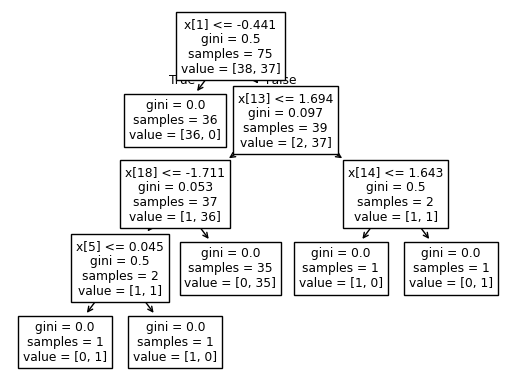

In [6]:
from sklearn import tree
tree.plot_tree(clf)